<a href="https://colab.research.google.com/github/hongqin/Faraway-Linear-model-with-Python/blob/master/nb/1intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install faraway

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 224 kB 5.5 MB/s 


In [2]:
# # Introduction
# ## Before You Start
# ## Initial Data Analysis
#	

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf


#	

import faraway.datasets.pima
pima = faraway.datasets.pima.load()
pima.head()


,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
type(pima)

pandas.core.frame.DataFrame

In [3]:
print(faraway.datasets.pima.DESCR)



Diabetes survey on Pima Indians

Description

The National Institute of Diabetes and Digestive and Kidney Diseases conducted a study on 768 adult female Pima Indians living near Phoenix.

Usage

data(pima)
Format

The dataset contains the following variables

pregnant
Number of times pregnant

glucose
Plasma glucose concentration at 2 hours in an oral glucose tolerance test

diastolic
Diastolic blood pressure (mm Hg)

triceps
Triceps skin fold thickness (mm)

insulin
2-Hour serum insulin (mu U/ml)

bmi
Body mass index (weight in kg/(height in metres squared))

diabetes
Diabetes pedigree function

age
Age (years)

test
test whether the patient shows signs of diabetes (coded 0 if negative, 1 if positive)

Source

The data may be obtained from UCI Repository of machine learning databases at http://archive.ics.uci.edu/ml/



In [5]:
pima.describe().round(1)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,0.5,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,0.3,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.2,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.4,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


Python version:3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]
matplotlib version: 3.2.2
pandas version: 1.3.5
numpy version: 1.21.6
statsmodels version: 0.12.2
seaborn version: 0.11.2


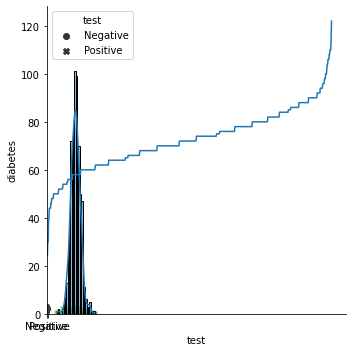

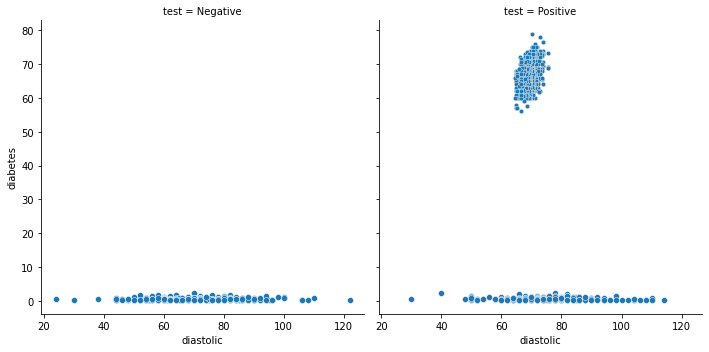

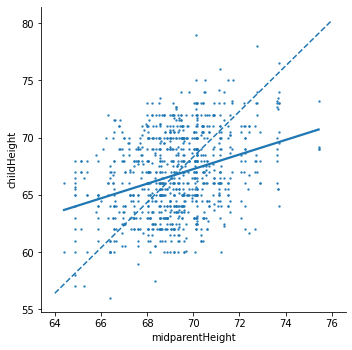

In [6]:


#	



#	




#	

pima['diastolic'].sort_values().head()


#	

np.sum(pima['diastolic'] == 0)


#	

pima.replace({'diastolic' : 0, 'triceps' : 0, 'insulin' : 0, 
    'glucose' : 0, 'bmi' : 0}, np.nan, inplace=True)


#	

pima['test'] = pima['test'].astype('category')
pima['test'] = pima['test'].cat.rename_categories(
    ['Negative','Positive'])
pima['test'].value_counts()


#	

sns.displot(pima.diastolic.dropna(), kde=True)


#	

pimad = pima.diastolic.dropna().sort_values()
sns.lineplot(x=range(0, len(pimad)), y=pimad)


#	

sns.scatterplot(x='diastolic',y='diabetes',data=pima, s=20)


#	

sns.boxplot(x="test", y="diabetes", data=pima)


#	

sns.scatterplot(x="diastolic", y="diabetes", data=pima, 
    style="test", alpha=0.3)


#	

sns.relplot(x="diastolic", y="diabetes", data=pima, col="test")


# ## When to Use Linear Modeling
# ## History
#	

import faraway.datasets.manilius
manilius = faraway.datasets.manilius.load()
manilius.head()


#	

moon3 = manilius.groupby('group').sum()
moon3


#	

moon3['intercept'] = [9]*3
np.linalg.solve(moon3[['intercept','sinang','cosang']],
    moon3['arc'])


#	

mod = smf.ols('arc ~ sinang + cosang', manilius).fit()
mod.params


#	

import faraway.datasets.families
families = faraway.datasets.families.load()
sns.scatterplot(x='midparentHeight', y='childHeight',
    data=families, s=20)


#	

mod = smf.ols('childHeight ~ midparentHeight', families).fit()
mod.params


#	

cor = sp.stats.pearsonr(families['childHeight'],
    families['midparentHeight'])[0]
sdy = np.std(families['childHeight'])
sdx = np.std(families['midparentHeight'])
beta = cor*sdy/sdx
alpha = np.mean(families['childHeight']) - \
    beta*np.mean(families['midparentHeight'])
np.round([alpha,beta],2)


#	

beta1 = sdy/sdx
alpha1 = np.mean(families['childHeight']) - \
    beta1*np.mean(families['midparentHeight'])


#	

sns.lmplot(x='midparentHeight', y='childHeight', data=families, 
    ci=None, scatter_kws={'s':2})
xr = np.array([64,76])
plt.plot(xr, alpha1 + xr*beta1,'--')


# ## Exercises

# ## Packages Used

import sys
import matplotlib
import statsmodels as sm
import seaborn as sns
print("Python version:{}".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("statsmodels version: {}".format(sm.__version__))
print("seaborn version: {}".format(sns.__version__))

    